Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/Stupen/Deep Learning/insurance.csv')
print(data.shape)
data.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Data Cleaning

In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data["sex"] = le.fit_transform(data["sex"])
data["smoker"] = le.fit_transform(data["smoker"])
data["region"] = le.fit_transform(data["region"])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Univariate Analysis

In [ ]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [ ]:
data['charges'].mode()

0    1639.5631
Name: charges, dtype: float64

In [ ]:
data.charges.sort_values(ascending=False)[:10]

543     63770.42801
1300    62592.87309
1230    60021.39897
577     58571.07448
819     55135.40209
1146    52590.82939
34      51194.55914
1241    49577.66240
1062    48970.24760
488     48885.13561
Name: charges, dtype: float64

<Axes: xlabel='children'>

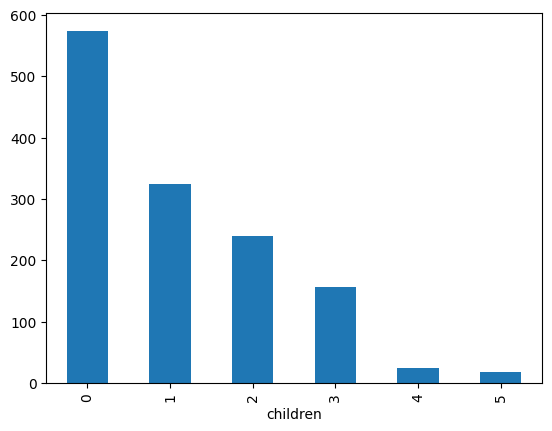

In [ ]:
data['children'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

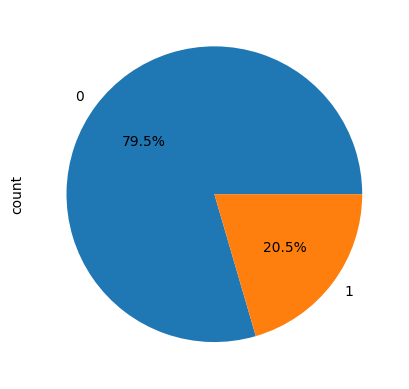

In [ ]:
data['smoker'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: ylabel='count'>

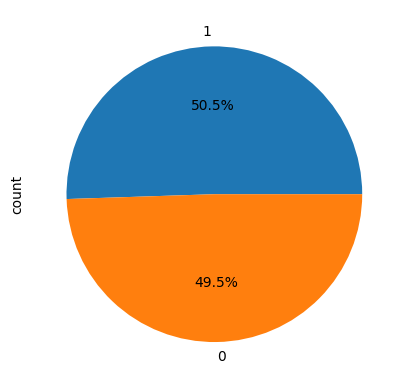

In [ ]:
data['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')

Bivariate Analysis

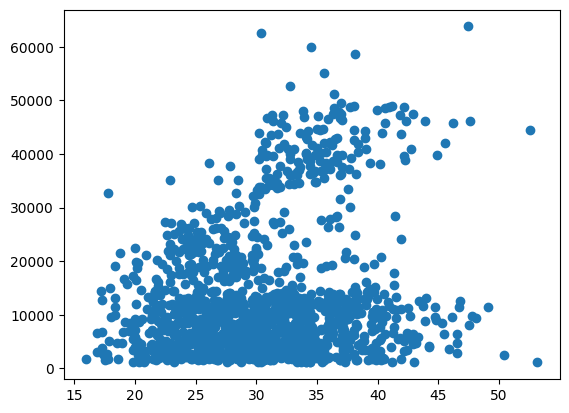

In [ ]:
plt.scatter(data['bmi'],data['charges'])

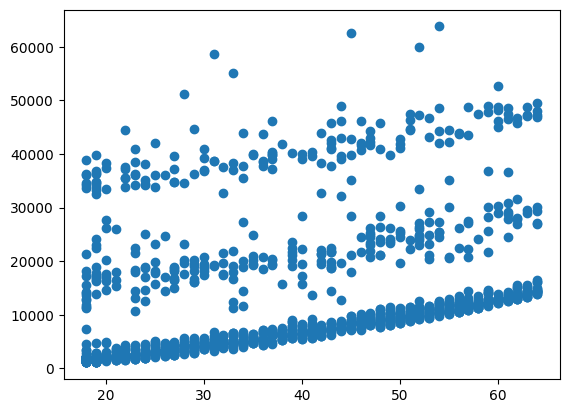

In [ ]:
plt.scatter(data['age'],data['charges'])

<Axes: >

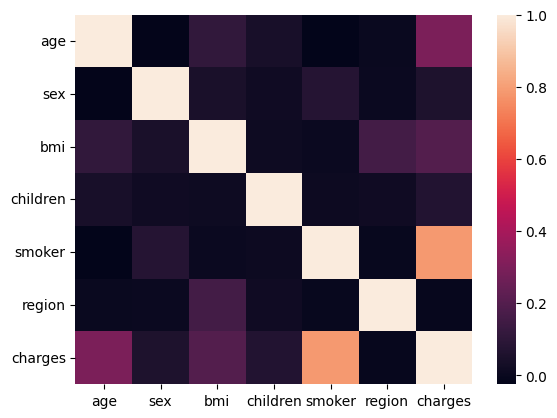

In [ ]:
sns.heatmap(data.corr())

Multivariate Analysis

In [ ]:
px.scatter(data,y='charges',x='bmi',color='smoker')

Menurut scatter plot di atas, saya mengambil kesimpulan bahwa yang BMI-nya tinggi + termasuk smoker, cenderung memiliki charges yang besar.

#Machine Learning (Regression)

In [ ]:
#menjadikan kolom charges sebagai target
y = data.pop('charges')

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler
StdSc = StandardScaler()
X = StdSc.fit_transform(data)
y = y / 1000

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size = 0.3)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

r2: 0.7694415927057693
MAE: 4.155239843059381
RMSE: 5.814246890069995


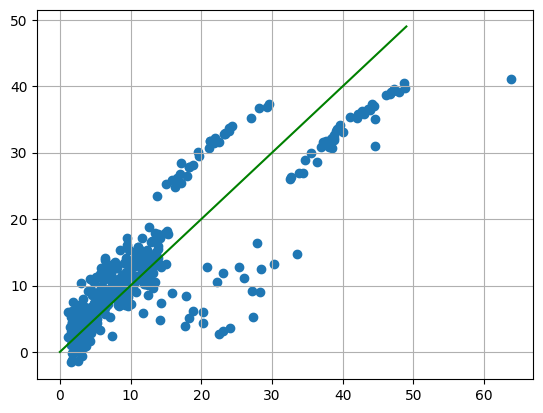

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_pred = y_predict.flatten()

print('r2:', r2_score(y_test,y_predict))
print('MAE:', mean_absolute_error(y_test,y_predict))
print('RMSE:', (mean_squared_error(y_test,y_predict)**0.5))

plt.scatter(y_test, y_pred)
plt.plot(np.arange(0,50), np.arange(0, 50), color = 'green')
plt.grid(True)

r2: 0.7037831216177682
MAE: 2.990907923778607
RMSE: 6.590341021476298


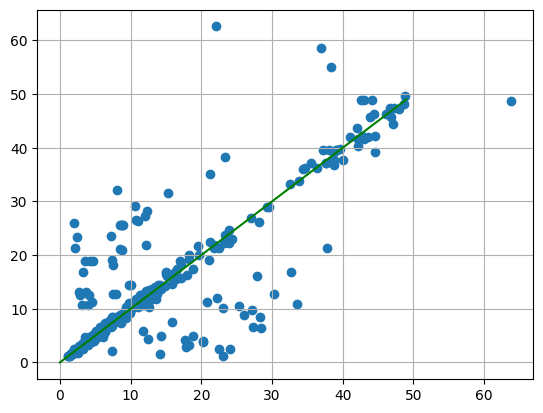

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_pred = y_predict.flatten()

print('r2:', r2_score(y_test,y_predict))
print('MAE:', mean_absolute_error(y_test,y_predict))
print('RMSE:', (mean_squared_error(y_test,y_predict)**0.5))

plt.scatter(y_test, y_pred)
plt.plot(np.arange(0,50), np.arange(0, 50), color = 'green')
plt.grid(True)

r2: 0.7730920674585434
MAE: 2.561862832210723
RMSE: 5.768034202791981


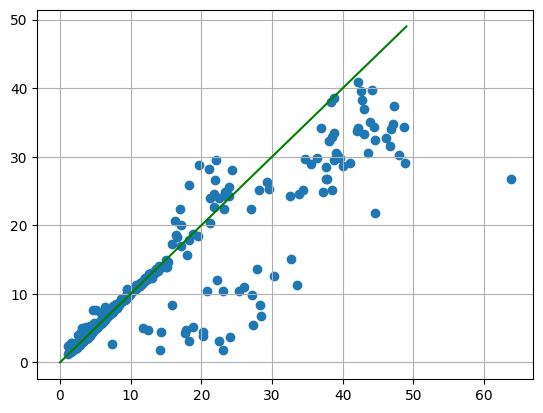

In [ ]:
from sklearn.svm import SVR
model = SVR()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_pred = y_predict.flatten()

print('r2:', r2_score(y_test,y_predict))
print('MAE:', mean_absolute_error(y_test,y_predict))
print('RMSE:', (mean_squared_error(y_test,y_predict)**0.5))

plt.scatter(y_test, y_pred)
plt.plot(np.arange(0,50), np.arange(0, 50), color = 'green')
plt.grid(True)

###Kesimpulan (Machine Learning - Regression)

- Hasil dari penerepan model regresi di atas adalah model SVR (Super Vector Regression)
- Hasil scatter plotnya menunjukan bahwa adanya hubungan yang positif antara variabel X dan variabel Y. Ini terlihat dari persebaran data yang naik dari kiri ke kanan
- Hasil R^2 sebesar 0.773 menunjukkan bahwa 77.3% variasi variabel Y dapat dijelaskan oleh variabel X. Dapat dikatakan bahwa antara X dan Y memiliki hubungan keterkaitan yang lumayan kuat antara kedua variabel.
- Mean Absolute Error (MAE) sebesar 2.56 menunjukkan bahwa rata-rata kesalahan prediksi model adalah 2.56
- Root Mean Squared Error (RMSE) sebesar 5.76 menunjukkan bahwa rata-rata kesalahan prediksi model dalam satuan kuadrat adalah 5.76

Dapat disimpulkan bahwa model regresi yang dihasilkan cukup akurat (hasil R^2, MAE, RMSE masih dapat diperbaiki dengan mengubah ratio pembagian data menjadi 8:2) dalam memprediksi nilai Y.



#Deep Learning (ANN Regression)

In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras import models, layers, optimizers

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Stupen/Deep Learning/insurance.csv')
print(df.shape)
df.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["sex"] = le.fit_transform(df["sex"])
df["smoker"] = le.fit_transform(df["smoker"])
df["region"] = le.fit_transform(df["region"])

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
# split into input (X) and output (Y) variables
X = df.drop(columns=['charges'])
y = df['charges']

In [ ]:
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X, y)

In [ ]:
network = models.Sequential()
network.add(layers.Dense(24, activation='relu', input_shape=(6,)))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(1))

In [ ]:
# evaluate model
network.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [ ]:
history = network.fit(X_train_dl, y_train_dl, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

Epoch 1/150
17/17 [==============================] - 1s 16ms/step - loss: 333542880.0000 - mae: 13381.7432 - val_loss: 306709216.0000 - val_mae: 13020.6270
Epoch 2/150
17/17 [==============================] - 0s 4ms/step - loss: 333034592.0000 - mae: 13364.1006 - val_loss: 306246272.0000 - val_mae: 13003.8555
Epoch 3/150
17/17 [==============================] - 0s 5ms/step - loss: 332552928.0000 - mae: 13347.1436 - val_loss: 305750432.0000 - val_mae: 12985.8438
Epoch 4/150
17/17 [==============================] - 0s 4ms/step - loss: 331968192.0000 - mae: 13326.9141 - val_loss: 305117152.0000 - val_mae: 12962.7510
Epoch 5/150
17/17 [==============================] - 0s 5ms/step - loss: 331199136.0000 - mae: 13299.5850 - val_loss: 304229696.0000 - val_mae: 12930.2773
Epoch 6/150
17/17 [==============================] - 0s 4ms/step - loss: 330119040.0000 - mae: 13262.0303 - val_loss: 303015936.0000 - val_mae: 12885.7646
Epoch 7/150
17/17 [==============================] - 0s 5ms/step - lo

In [ ]:
# Print metrics after training
print("Final Metrics:")
print("Train:")
print("\tMAE:", history.history['mae'][-1])
print("Validation:")
print("\tMAE:", history.history['val_mae'][-1])

Final Metrics:
Train:
	MAE: 9285.3212890625
Validation:
	MAE: 8868.4130859375


dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


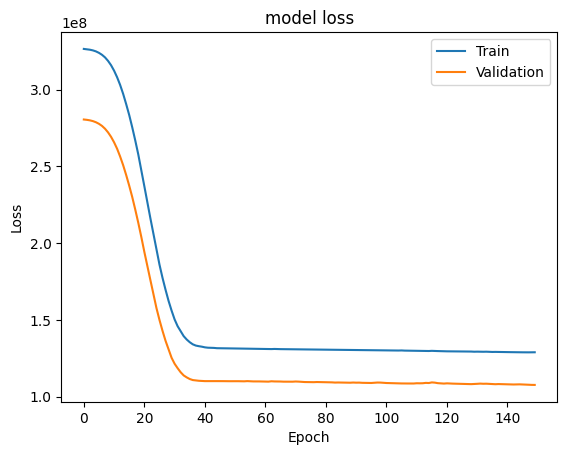

In [ ]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

##Predict New Data

In [ ]:
Xnew = np.array([[19, 0, 27.900, 0, 1, 3]]) #input yang dimasukan disamakan dengan data pertama di dataset

ynew = network.predict(Xnew)

# Print the results using f-strings for better readability
print("X=%s \n Predicted=%s" % (Xnew[0], ynew[0]))

1/1 [==============================] - 0s 64ms/step
X=[19.   0.  27.9  0.   1.   3. ] 
 Predicted=[9382.231]


###Kesimpulan (Deep Learning - ANN Regression)

- Dari hasil pengujian deep learning, dihasilkan nilai mae yang cukup besar yaitu 8868.41, menurut saya hal itu dikarenakan data charges memiliki nilai yang besar (ribuan hingga puluhan ribu) sehingga nilai mae yang dihasilkan pun cukup besar. Namun, walaupun begitu dapat diambil kesimpulan juga bahwa hasil mae-nya memang memiliki angka yang besar yang berarti model yang dibuat belum bisa menangani data dengan baik.
- Hasil dari predict new data (di akhir cell) pun membuktikan bahwa model tidak dapat memprediksi dengan baik, dikarenan data predict yang saya masukan adalah data yang sama seperti pada dataset row 1, di mana nilai charges-nya adalah 16884.92, namun pada predict new data charges yang diprediksi adalah 9382.231.

###Kesimpulan Akhir

- menurut saya model yang baik untuk menangani data ini adalah model Machine Learning - SVR, dikarenakan model tersebut memiliki nilai R2 yang cukup baik dan memiliki nilai error yang tidak terlalu besar